In [31]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
result0 = pd.read_csv('./kuma/out/kuma_out_gini_meas_level.csv')
result1 = pd.read_csv('./kuma/out/kuma_out_gini_level.csv')

In [144]:
rank = pd.read_csv('./kuma/rank.csv', header=None, names=( "file name index", "rank"))

In [145]:
data0 = pd.concat([result0, rank['rank']], axis=1, join='inner')
data1 = pd.concat([result1, rank['rank']], axis=1, join='inner')

In [146]:
data0.loc[:, 'measurement_mean'] = (data0['measurement0'] + data0['measurement1']) / 2
data0.loc[:, 'gini_mean'] = (data0['gini0'] + data0['gini1']) / 2
data0_mean =  data0[['file name', 'rank', 'measurement_mean', 'gini_mean']]

In [147]:
data1.loc[:, 'measurement_mean'] = (data1['measurement0'] + data1['measurement1']) / 2
data1.loc[:, 'gini_mean'] = (data1['gini0'] + data1['gini1']) / 2
data1_mean =  data1[['file name', 'rank', 'measurement_mean', 'gini_mean']]

In [148]:
data0_mean.loc[:,'measurement_norm'] = (data0['measurement_mean'] -data0['measurement_mean'].mean())/data0['measurement_mean'].std()
data0_mean.loc[:,'gini_norm'] = (data0['gini_mean'] -data0['gini_mean'].mean())/data0['gini_mean'].std()

data1_mean.loc[:,'measurement_norm'] = (data1['measurement_mean'] -data1['measurement_mean'].mean())/data1['measurement_mean'].std()
data1_mean.loc[:,'gini_norm'] = (data1['gini_mean'] -data1['gini_mean'].mean())/data1['gini_mean'].std()

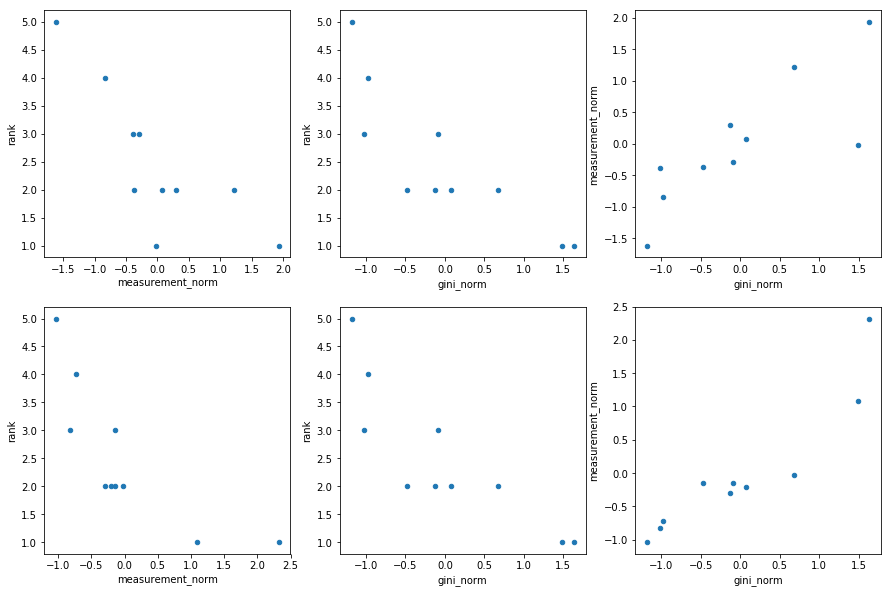

In [149]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
data0_mean[['rank', 'measurement_norm']].plot(y='rank', x='measurement_norm', kind='scatter', ax=axes[0,0], legend=False)
data0_mean[['rank', 'gini_norm']].plot(y='rank', x='gini_norm', kind='scatter', ax=axes[0,1], legend=False)
data0_mean[['measurement_norm', 'gini_norm']].plot(y='measurement_norm', x='gini_norm', kind='scatter', ax=axes[0,2], legend=False)

data1_mean[['rank', 'measurement_norm']].plot(y='rank', x='measurement_norm', kind='scatter', ax=axes[1,0], legend=False)
data1_mean[['rank', 'gini_norm']].plot(y='rank', x='gini_norm', kind='scatter', ax=axes[1,1], legend=False)
data1_mean[['measurement_norm', 'gini_norm']].plot(y='measurement_norm', x='gini_norm', kind='scatter', ax=axes[1,2], legend=False)

In [150]:
data0_mean[['rank', 'measurement_norm', 'measurement_mean', 'gini_mean', 'gini_norm']].corr()

,rank,measurement_norm,measurement_mean,gini_mean,gini_norm
rank,1.000000,-0.799021,-0.799021,-0.852434,-0.852434
measurement_norm,-0.799021,1.000000,1.000000,0.805279,0.805279
measurement_mean,-0.799021,1.000000,1.000000,0.805279,0.805279
gini_mean,-0.852434,0.805279,0.805279,1.000000,1.000000
gini_norm,-0.852434,0.805279,0.805279,1.000000,1.000000


In [151]:
data1_mean[['rank', 'measurement_norm', 'measurement_mean', 'gini_mean', 'gini_norm']].corr()

,rank,measurement_norm,measurement_mean,gini_mean,gini_norm
rank,1.000000,-0.781647,-0.781647,-0.852434,-0.852434
measurement_norm,-0.781647,1.000000,1.000000,0.918737,0.918737
measurement_mean,-0.781647,1.000000,1.000000,0.918737,0.918737
gini_mean,-0.852434,0.918737,0.918737,1.000000,1.000000
gini_norm,-0.852434,0.918737,0.918737,1.000000,1.000000
